# Customer exit prediction - data preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
train_df = pd.read_csv('train.csv', index_col = 'id')
test_df = pd.read_csv('test.csv', index_col = 'id')

In [3]:
df = pd.concat([train_df, test_df])

### Intial look at the data

In [4]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,,,,,,,,,,,,,
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0.0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0.0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0.0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0.0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0.0


In [5]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited             float64
dtype: object

In [6]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,2.750570e+05,275057.000000,275057.000000,275057.000000,275057.000000,275057.000000,275057.000000,275057.000000,275057.000000,165034.000000
mean,1.569204e+07,656.484939,38.124415,5.010867,55420.296450,1.554002,0.753589,0.496755,112470.952558,0.211599
std,7.151271e+04,80.188100,8.864927,2.806173,62805.933171,0.546178,0.430921,0.499990,50286.608747,0.408443
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563300e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74580.800000,0.000000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117848.090000,0.000000
75%,1.575688e+07,710.000000,42.000000,7.000000,120037.960000,2.000000,1.000000,1.000000,154871.130000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [7]:
# Probably we won't need Customer ID and Surname so let's drop it

df.drop(['CustomerId', 'Surname'], axis = 1, inplace = True)

### Exploratory analysis and feature preparation

Correlation

<Axes: >

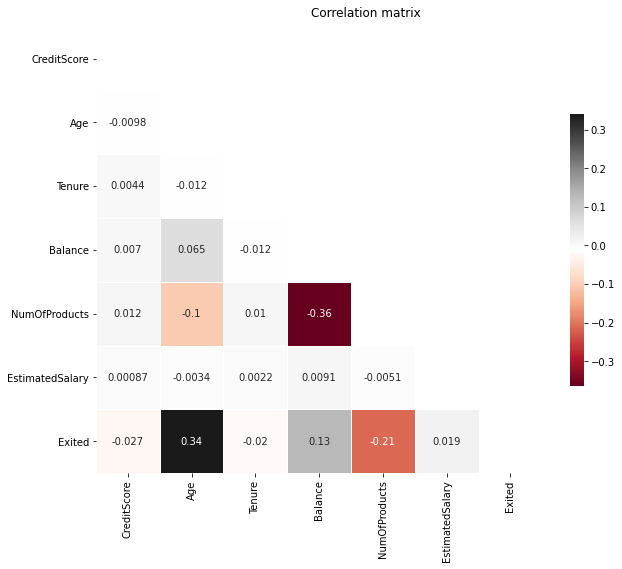

In [8]:
corr = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(10, 10))
fig.suptitle('Correlation matrix', y = 0.84)
sn.heatmap(corr, annot=True, mask=mask, cmap='RdGy', square=True, linewidths=.5, cbar_kws={"shrink": .5})

Mutual Information

In [9]:
from sklearn import feature_selection

target = 'Exited'
numFeatures = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
catFeatures = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

mi = []
for var in catFeatures:
    mi.append(feature_selection.mutual_info_classif(train_df[var].astype('category').cat.codes.values.reshape(-1,1), 
                                                    train_df[target].values)[0])

Mutual Information for categorical variables: 
Geography = 0.025216625038488205
Gender = 0.03171760435762727
HasCrCard = 0.02272465748183028
IsActiveMember = 0.043871198672397194


In [10]:
for var in numFeatures:
    mi.append(feature_selection.mutual_info_classif(train_df[var].values.reshape(-1,1), train_df[target].values)[0])

Mutual Information for numerical variables: 
CreditScore = 0.0010221941894521525
Age = 0.08409492181315992
Tenure = 0.004869064865396622
Balance = 0.014465867811876088
NumOfProducts = 0.09860627201771344
EstimatedSalary = 0.00722836013334871


In [11]:
Features = catFeatures + numFeatures
df_mi = pd.DataFrame({'Feature': Features, 'Mutual Information': mi})

<Axes: xlabel='Mutual Information', ylabel='Feature'>

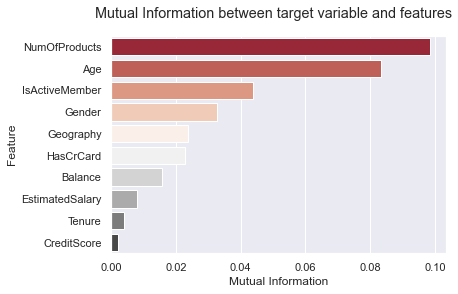

In [12]:
sn.set_theme(style = 'darkgrid')
plt.suptitle('Mutual Information between target variable and features')
sn.barplot(data = df_mi.sort_values('Mutual Information', ascending = False), x = 'Mutual Information', y = 'Feature',
           palette = 'RdGy')

**Numerical variables**

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

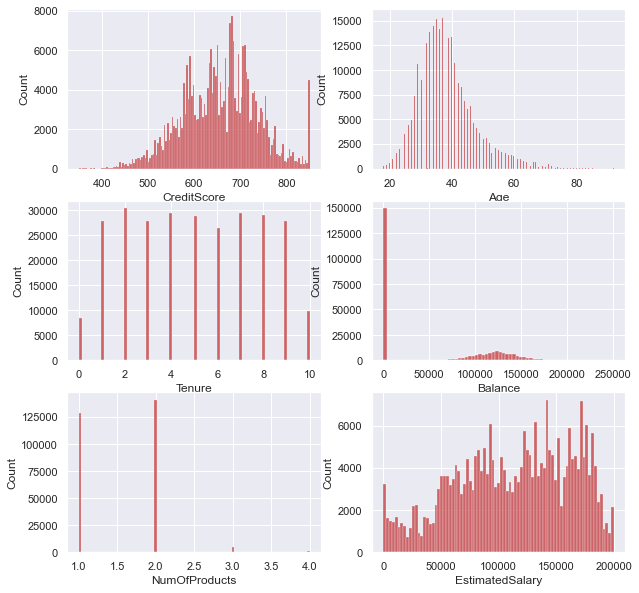

In [13]:
sn.set_palette('RdGy')
fig, ax = plt.subplots(3, 2, figsize = (10,10))

sn.histplot(df['CreditScore'], ax = ax[0,0])
sn.histplot(df['Age'], ax = ax[0,1])
sn.histplot(df['Tenure'], ax = ax[1,0])
sn.histplot(df['Balance'], ax = ax[1,1])
sn.histplot(df['NumOfProducts'], ax = ax[2,0])
sn.histplot(df['EstimatedSalary'], ax = ax[2,1])

In [14]:
# Sometimes it's usefull to discretize age into brackets

df['Age_bracket'] = pd.cut(df['Age'], [0,25,35,45,55,100])
df['Age_bracket'].value_counts()

Age_bracket
(35, 45]     112047
(25, 35]     104489
(45, 55]      32810
(55, 100]     13887
(0, 25]       11824
Name: count, dtype: int64

In [15]:
# Same with salary

df['Salary_bracket'] = pd.cut(df['EstimatedSalary'], [0,50000,100000,150000,200000])
df['Salary_bracket'].value_counts()

Salary_bracket
(100000, 150000]    86949
(50000, 100000]     78107
(150000, 200000]    76472
(0, 50000]          33529
Name: count, dtype: int64

In [ ]:
# And with credit score

df['CreditScore_bracket'] = pd.cut(df['CreditScore'], [349,500,600,700,800,851])
df['CreditScore_bracket'].value_counts()

In [16]:
# The are a lot of zeros in the Balance feature, it may be good idea to binarize it 

df['Balance_positive'] = np.where(df['Balance'] > 0, 1, 0)
df['Balance_positive'].value_counts()

Balance_positive
0    149533
1    125524
Name: count, dtype: int64

**Categorical Features**

<Axes: xlabel='NumOfProducts', ylabel='count'>

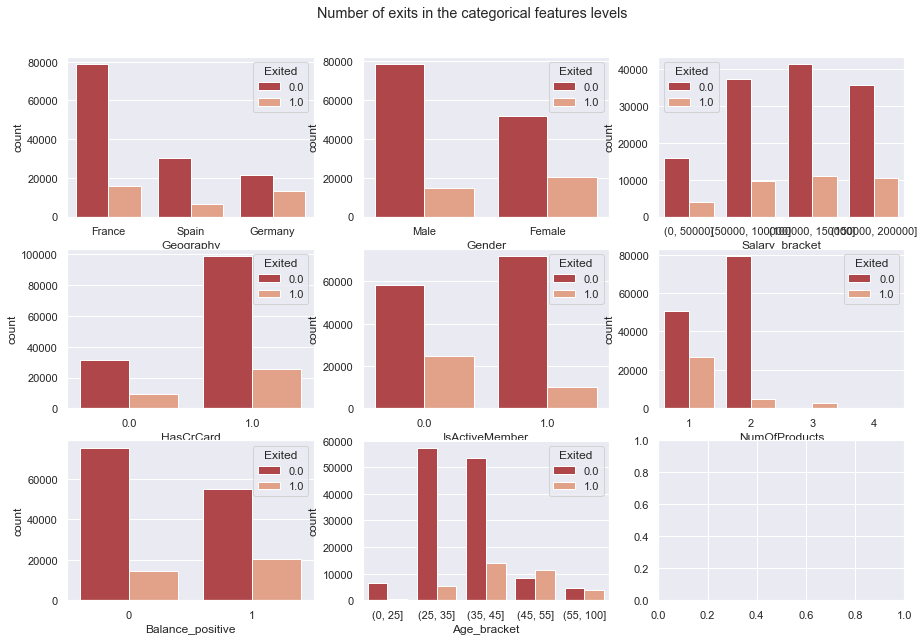

In [17]:
fig, ax = plt.subplots(3, 3, figsize = (15,10))

plt.suptitle('Number of exits in the categorical features levels', y = 0.95)
sn.countplot(data = df, x = 'Geography', hue = df['Exited'], ax = ax[0,0])
sn.countplot(data = df, x = 'Gender', hue = df['Exited'], ax = ax[0,1])
sn.countplot(data = df, x = 'HasCrCard', hue = df['Exited'], ax = ax[1,0])
sn.countplot(data = df, x = 'IsActiveMember', hue = df['Exited'], ax = ax[1,1])
sn.countplot(data = df, x = 'Balance_positive', hue = df['Exited'], ax = ax[2,0])
sn.countplot(data = df, x = 'Age_bracket', hue = df['Exited'], ax = ax[2,1])
sn.countplot(data = df, x = 'Salary_bracket', hue = df['Exited'], ax = ax[0,2])
sn.countplot(data = df, x = 'NumOfProducts', hue = df['Exited'], ax = ax[1,2])

Let's check mutual information again with new features.

In [34]:
numFeatures = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
catFeatures = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Salary_bracket', 'Age_bracket', 'Balance_positive',
               'CreditScore_bracket']
df[catFeatures] = df[catFeatures].astype(object)
train = df.iloc[train_df.index]
mi = []
for var in catFeatures:
    mi.append(feature_selection.mutual_info_classif(train[var].astype('category').cat.codes.values.reshape(-1,1), 
                                                    train[target].values)[0])
for var in numFeatures:
    mi.append(feature_selection.mutual_info_classif(train[var].values.reshape(-1,1), train[target].values)[0])

<Axes: xlabel='Mutual Information', ylabel='Feature'>

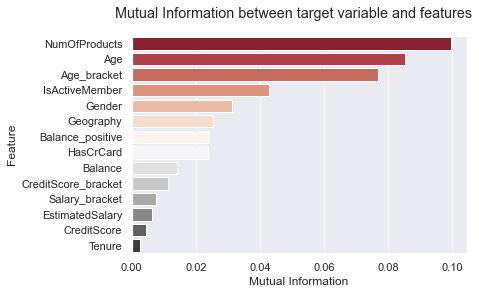

In [36]:
Features = catFeatures + numFeatures
df_mi = pd.DataFrame({'Feature': Features, 'Mutual Information': mi})

plt.suptitle('Mutual Information between target variable and features')
sn.barplot(data = df_mi.sort_values('Mutual Information', ascending = False), x = 'Mutual Information', y = 'Feature',
           palette = 'RdGy')

<Axes: xlabel='Tenure', ylabel='count'>

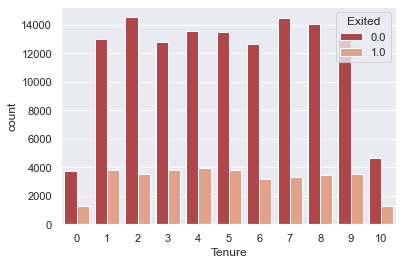

In [37]:
sn.countplot(data = df, x = 'Tenure', hue = 'Exited')

In [42]:
train_df_preped = df.iloc[train_df.index]
test_df_preped = df.iloc[test_df.index]

In [47]:
#train_df_preped.to_csv('train_prep.csv')
#test_df_preped.to_csv('test_prep.csv')